#### Prepare

In [ ]:
# Import library
library("microbiome")
library("phyloseq")
library("ggplot2")
library("vegan")
library("Rtsne") 

In [2]:
# Import data
data(dietswap)
pseq <- dietswap

# Convert to compositional data
pseq.rel <- microbiome::transform(pseq, "compositional")

# Pick core taxa with with the given prevalence and detection limits
pseq.core <- core(pseq.rel, detection = .1/100, prevalence = 90/100)

# Use relative abundances for the core
pseq.core <- microbiome::transform(pseq.core, "compositional")

head(otu_table(pseq.core))
head(sample_data(pseq.core))
head(tax_table(pseq.core))

,Sample-1,Sample-2,Sample-3,Sample-4,Sample-5,Sample-6,Sample-7,Sample-8,Sample-9,Sample-10,⋯,Sample-213,Sample-214,Sample-215,Sample-216,Sample-217,Sample-218,Sample-219,Sample-220,Sample-221,Sample-222
Allistipes et rel.,0.055036855,0.0033691641,0.001347608,0.008883131,0.003037818,0.0009584484,0.004004089,0.0024091647,0.002775575,0.0022029562,⋯,0.003627935,0.002100721,0.013896687,0.007713832,0.002954521,0.010747185,0.045033028,0.004015373,0.013112604,0.003643573
Bacteroides fragilis et rel.,0.072563473,0.0011230547,0.002732650,0.002683446,0.002045877,0.0007893105,0.001874255,0.0275333104,0.001586043,0.0018476407,⋯,0.001965132,0.003065917,0.051375632,0.037737276,0.003534874,0.006550665,0.008384146,0.002466586,0.060154073,0.013770562
Bacteroides splachnicus et rel.,0.007371007,0.0009626183,0.001534776,0.002220783,0.001859888,0.0007893105,0.001363094,0.0008358326,0.002180809,0.0009948835,⋯,0.001360476,0.002895588,0.005614823,0.004235045,0.001582779,0.002251791,0.012576220,0.002753399,0.008523193,0.010662809
Bacteroides vulgatus et rel.,0.454381654,0.0025669822,0.017032268,0.043397798,0.010353379,0.0042284490,0.002811382,0.0041791632,0.002577320,0.0024872086,⋯,0.011085357,0.010106172,0.009685570,0.020116464,0.005012135,0.009928352,0.220401423,0.009522171,0.018521554,0.026147993
Bifidobacterium,0.007043407,0.0013369699,0.006850341,0.045618581,0.001363918,0.0013531037,0.009882433,0.0030483308,0.029936558,0.0014212621,⋯,0.001058148,0.009254528,0.002667041,0.002193148,0.007491822,0.003172979,0.004509654,0.001778237,0.001884937,0.005626105
Bryantella formatexigens et rel.,0.012776413,0.0056687523,0.004716628,0.004349033,0.003347799,0.0029317246,0.006219117,0.0021141649,0.008128469,0.0034110290,⋯,0.002771339,0.003576903,0.004491859,0.002344400,0.002901762,0.003172979,0.003747459,0.001950324,0.003196197,0.005947597


,subject,sex,nationality,group,sample,timepoint,timepoint.within.group,bmi_group
,<fct>,<fct>,<fct>,<fct>,<chr>,<int>,<int>,<fct>
Sample-1,byn,male,AAM,DI,Sample-1,4,1,obese
Sample-2,nms,male,AFR,HE,Sample-2,2,1,lean
Sample-3,olt,male,AFR,HE,Sample-3,2,1,overweight
Sample-4,pku,female,AFR,HE,Sample-4,2,1,obese
Sample-5,qjy,female,AFR,HE,Sample-5,2,1,overweight
Sample-6,riv,female,AFR,HE,Sample-6,2,1,obese


,Phylum,Family,Genus
Allistipes et rel.,Bacteroidetes,Bacteroidetes,Allistipes et rel.
Bacteroides fragilis et rel.,Bacteroidetes,Bacteroidetes,Bacteroides fragilis et rel.
Bacteroides splachnicus et rel.,Bacteroidetes,Bacteroidetes,Bacteroides splachnicus et rel.
Bacteroides vulgatus et rel.,Bacteroidetes,Bacteroidetes,Bacteroides vulgatus et rel.
Bifidobacterium,Actinobacteria,Actinobacteria,Bifidobacterium
Bryantella formatexigens et rel.,Firmicutes,Clostridium cluster XIVa,Bryantella formatexigens et rel.


#### Sample ordination

In [7]:
# Ordinate the data
set.seed(4235421)
# proj <- get_ordination(pseq, "MDS", "bray")
ord <- ordinate(pseq, "MDS", "bray")

#### Multidimensional scaling (MDS / PCoA)

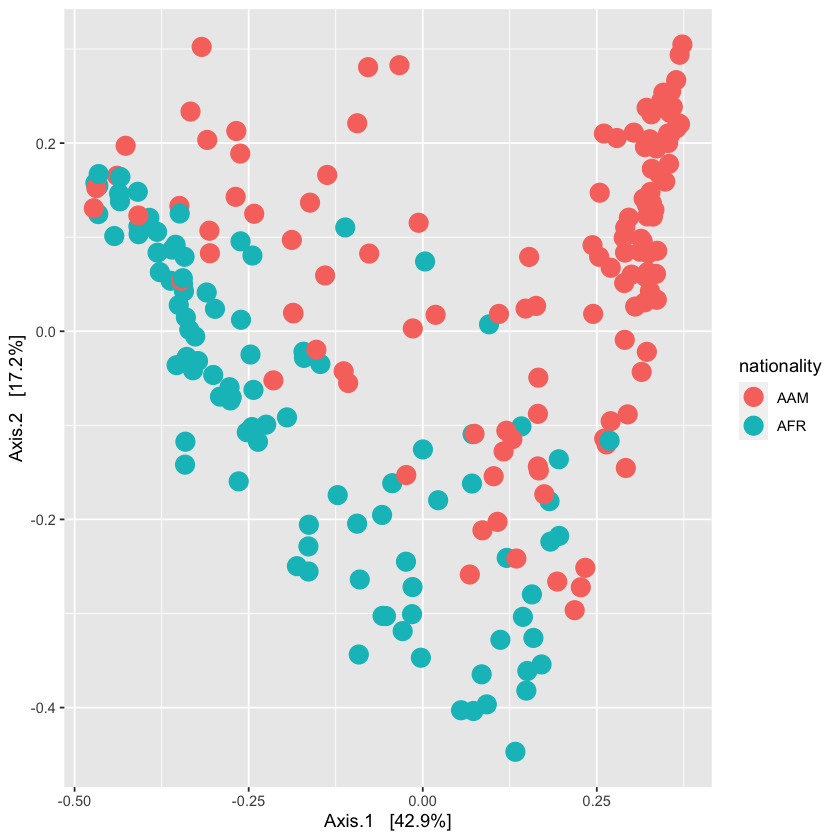

In [10]:
pseq.mds <- ordinate(pseq, "MDS", "bray")
p <- plot_ordination(pseq, pseq.mds, color = "nationality") +
                geom_point(size = 5)

print(p)

#### Canonical correspondence analysis (CCA)

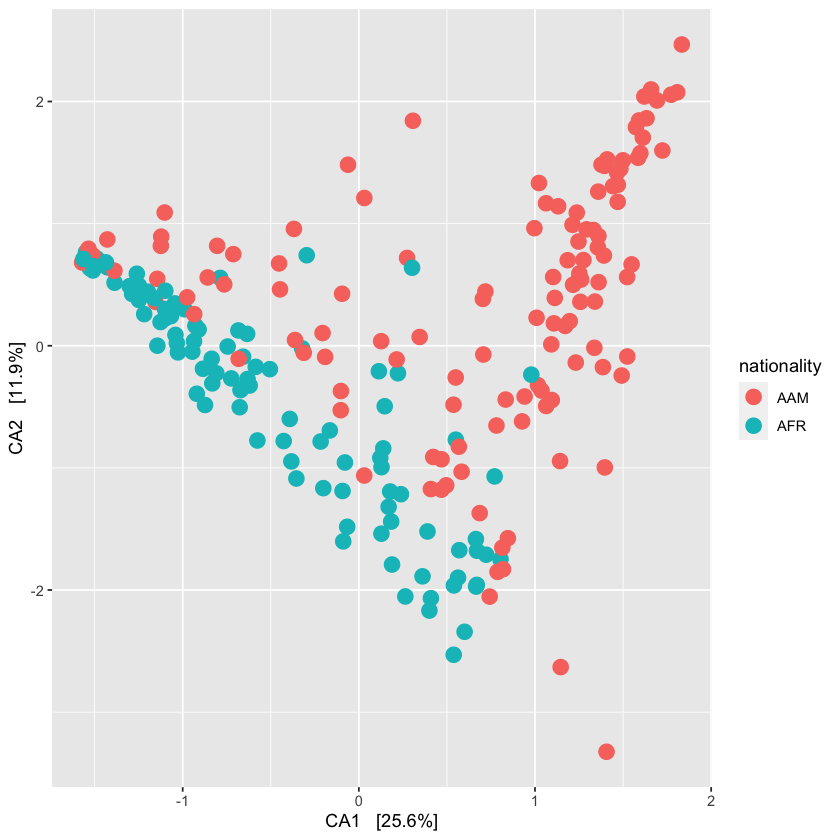

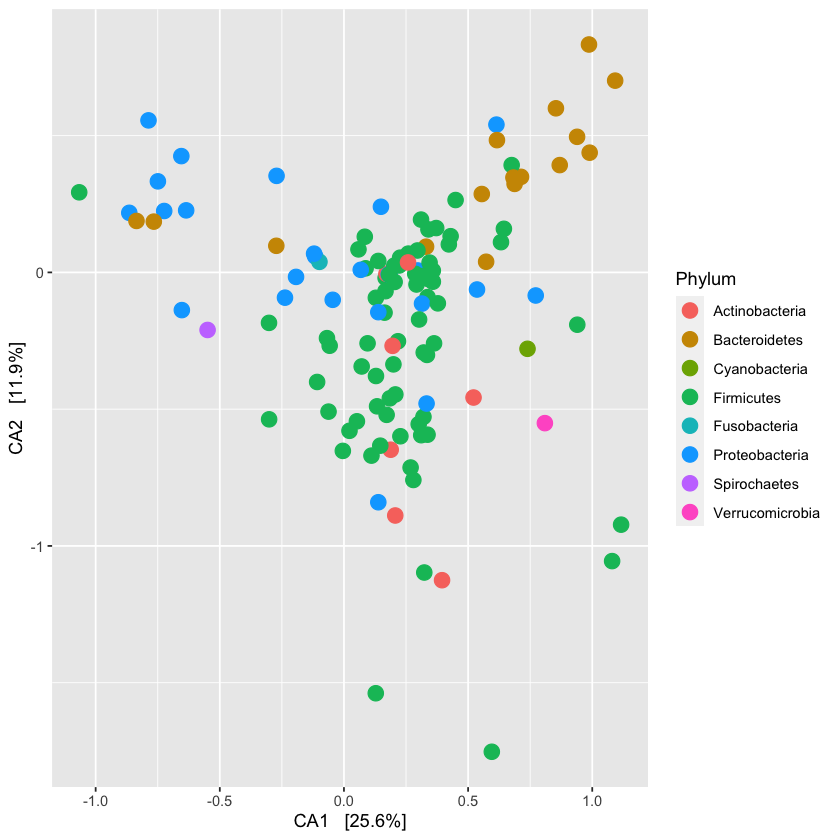

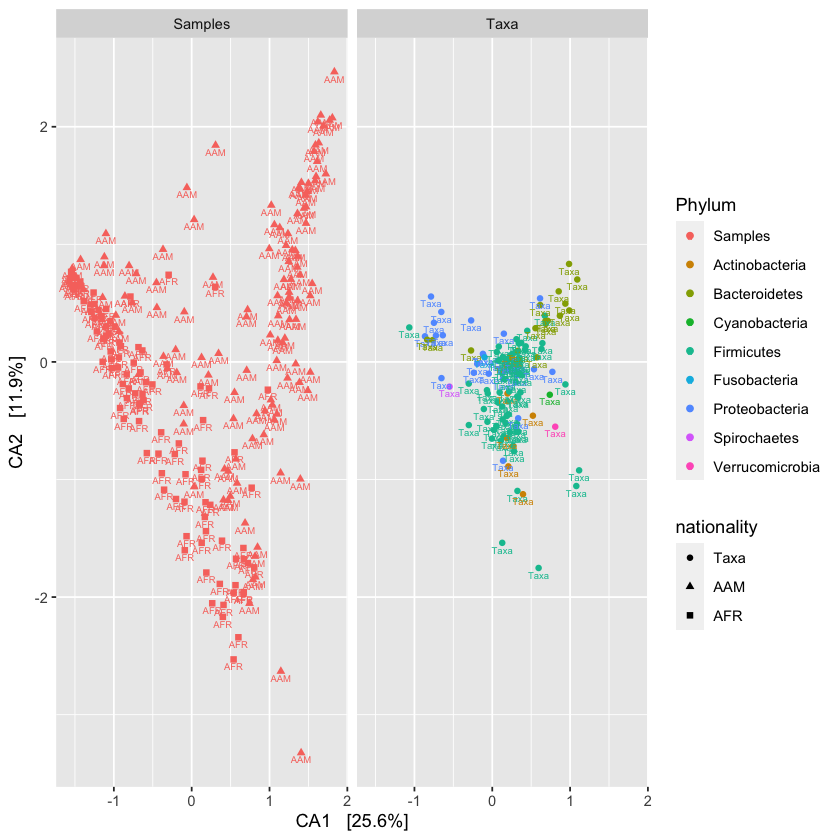

In [12]:
# With samples
pseq.cca <- ordinate(pseq, "CCA")
p <- plot_ordination(pseq, pseq.cca,
       type = "samples", color = "nationality")
p <- p + geom_point(size = 4)

print(p)

# With taxa:
p <- plot_ordination(pseq, pseq.cca,
       type = "taxa", color = "Phylum")
p <- p + geom_point(size = 4)

print(p)

# Split plot
p <- plot_ordination(pseq, pseq.cca,
              type = "split", shape = "nationality", 
                  color = "Phylum", label = "nationality")

print(p)

#### t-SNE (use the same method as 'Microbiome Landscapes')

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-6


Attaching package: ‘vegan’


The following object is masked from ‘package:microbiome’:

    diversity




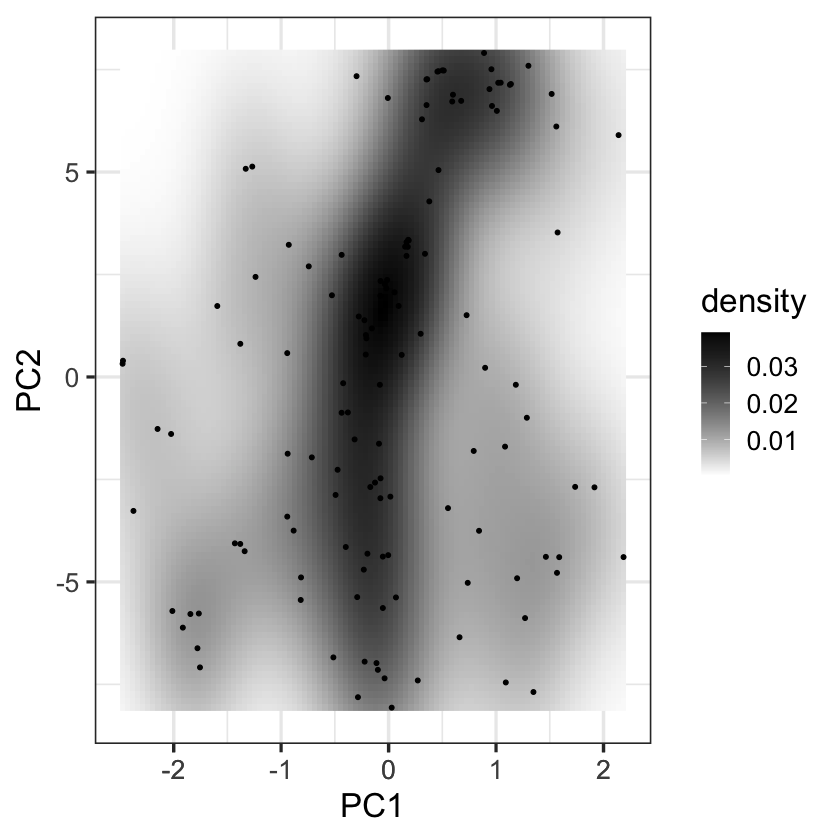

In [13]:
set.seed(423542)

method <- "tsne"
trans <- "hellinger"
distance <- "euclidean"

# Distance matrix for samples
ps <- microbiome::transform(pseq, trans)

# Calculate sample similarities
dm <- vegdist(otu_table(ps), distance)

# Run TSNE
tsne_out <- Rtsne(dm, dims = 2) 
proj <- tsne_out$Y
rownames(proj) <- rownames(otu_table(ps))

p <- plot_landscape(proj, legend = T, size = 1) 

print(p)